### AI Adoption Analysis Acrross Various Sectors and Countries

 the influence of AI-generated content across various industries, including journalism, social media, entertainment, and marketing. It provides insights into public sentiment, engagement trends, economic impact, and regulatory responses over time.

 Dataset: https://www.kaggle.com/datasets/atharvasoundankar/impact-of-ai-on-digital-media-2020-2025
 

In [1]:
# Required imports:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_path = 'Global_AI_Content_Impact_Dataset.csv'


In [102]:
# Load the dataset
df = pd.read_csv(data_path)
df.head(10)

,Country,Year,Industry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Top AI Tools Used,Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%)
0,South Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Bard,Strict,40.77,18.73
1,China,2025,Legal,34.75,66.74,46.89,52.46,26.17,DALL-E,Strict,35.67,35.02
2,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Stable Diffusion,Moderate,54.47,22.76
3,France,2021,Legal,85.24,93.76,27.70,78.24,29.45,Claude,Moderate,51.84,1.93
4,France,2021,Gaming,78.95,45.62,17.45,1.05,21.70,Midjourney,Strict,41.77,21.41
5,USA,2021,Retail,66.95,47.72,0.86,27.58,64.42,ChatGPT,Lenient,68.14,8.09
6,Australia,2023,Media,68.23,6.14,6.20,53.13,53.16,Claude,Moderate,71.60,15.26
7,UK,2023,Gaming,91.27,33.87,41.67,56.26,59.93,ChatGPT,Moderate,46.98,28.51
8,Canada,2025,Education,17.02,87.77,4.59,52.45,64.72,Claude,Moderate,60.55,22.70
9,China,2025,Healthcare,25.50,18.74,15.07,40.81,64.86,Stable Diffusion,Moderate,51.07,39.97


Text(0.5, 1.0, 'Missing Values in Dataset')

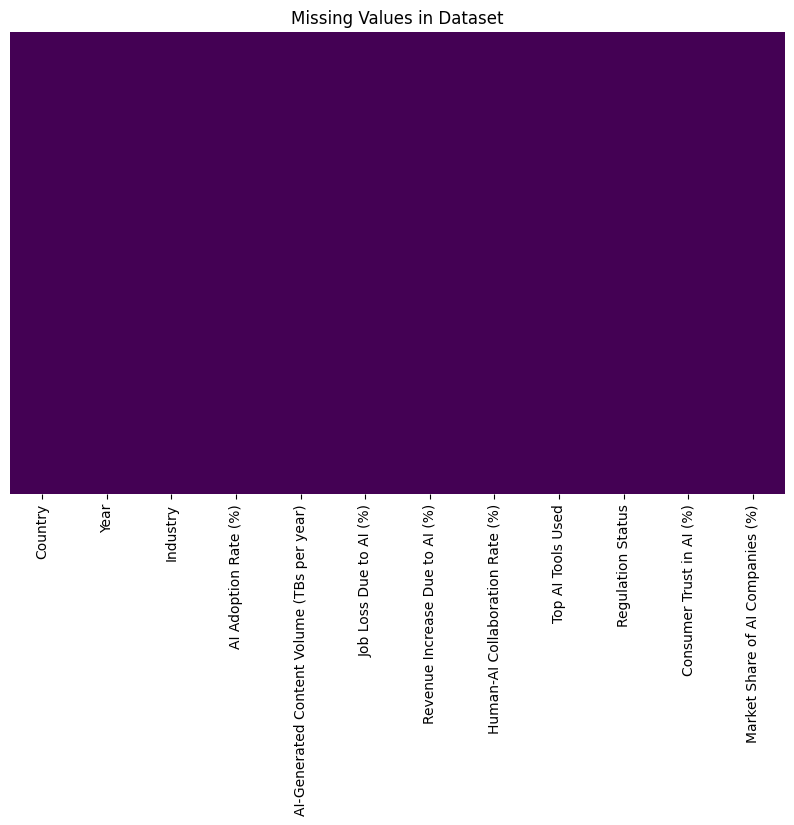

In [130]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values in Dataset')
# The heatmap shows that there are no missing values in the dataset

In [103]:
df.head(10)

,Country,Year,Industry,AI Adoption Rate (%),AI-Generated Content Volume (TBs per year),Job Loss Due to AI (%),Revenue Increase Due to AI (%),Human-AI Collaboration Rate (%),Top AI Tools Used,Regulation Status,Consumer Trust in AI (%),Market Share of AI Companies (%)
0,South Korea,2022,Media,44.29,33.09,16.77,46.12,74.79,Bard,Strict,40.77,18.73
1,China,2025,Legal,34.75,66.74,46.89,52.46,26.17,DALL-E,Strict,35.67,35.02
2,USA,2022,Automotive,81.06,96.13,10.66,45.60,39.66,Stable Diffusion,Moderate,54.47,22.76
3,France,2021,Legal,85.24,93.76,27.70,78.24,29.45,Claude,Moderate,51.84,1.93
4,France,2021,Gaming,78.95,45.62,17.45,1.05,21.70,Midjourney,Strict,41.77,21.41
5,USA,2021,Retail,66.95,47.72,0.86,27.58,64.42,ChatGPT,Lenient,68.14,8.09
6,Australia,2023,Media,68.23,6.14,6.20,53.13,53.16,Claude,Moderate,71.60,15.26
7,UK,2023,Gaming,91.27,33.87,41.67,56.26,59.93,ChatGPT,Moderate,46.98,28.51
8,Canada,2025,Education,17.02,87.77,4.59,52.45,64.72,Claude,Moderate,60.55,22.70
9,China,2025,Healthcare,25.50,18.74,15.07,40.81,64.86,Stable Diffusion,Moderate,51.07,39.97


In [114]:
# categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for cat_col in cat_cols:
    print(f"Unique values in {cat_col}: {df[cat_col].unique()}")
    print(f"Number of unique values in {cat_col}: {df[cat_col].nunique()}")
    print("\n")

Unique values in Country: ['South Korea' 'China' 'USA' 'France' 'Australia' 'UK' 'Canada' 'India'
 'Japan' 'Germany']
Number of unique values in Country: 10


Unique values in Industry: ['Media' 'Legal' 'Automotive' 'Gaming' 'Retail' 'Education' 'Healthcare'
 'Marketing' 'Manufacturing' 'Finance']
Number of unique values in Industry: 10


Unique values in Top AI Tools Used: ['Bard' 'DALL-E' 'Stable Diffusion' 'Claude' 'Midjourney' 'ChatGPT'
 'Synthesia']
Number of unique values in Top AI Tools Used: 7


Unique values in Regulation Status: ['Strict' 'Moderate' 'Lenient']
Number of unique values in Regulation Status: 3




C:\Users\Cesar Dushimimana\AppData\Local\Temp\ipykernel_26464\3015013867.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='AI Adoption Rate (%)', data=df_sorted, order=country_order, palette='viridis')


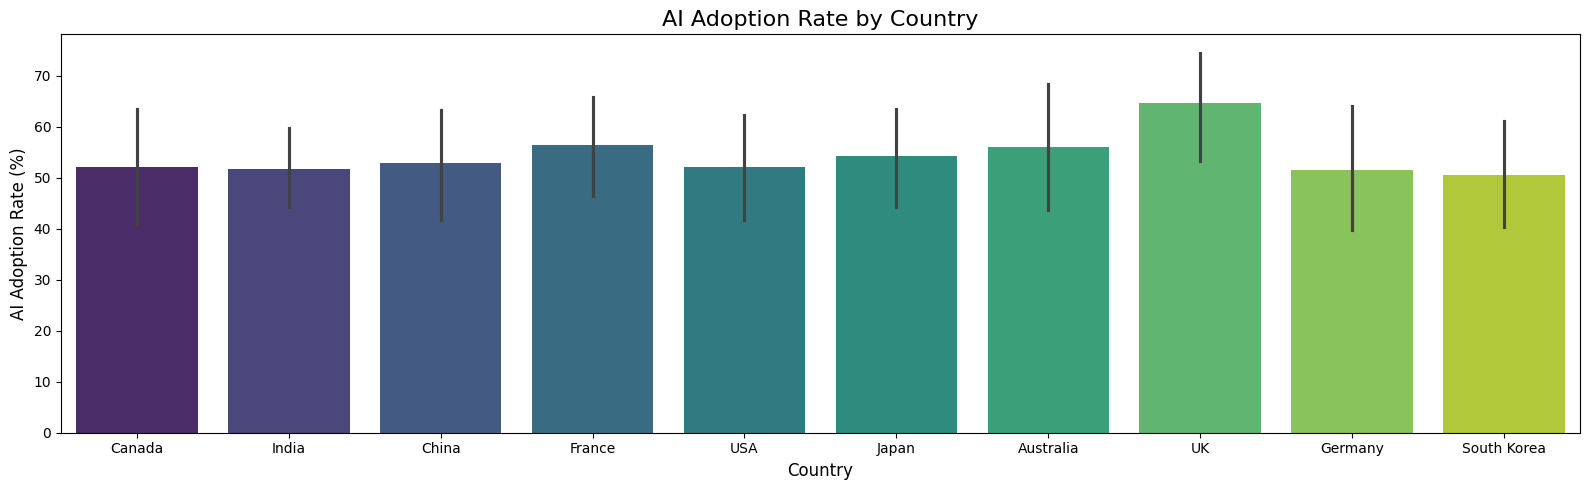

In [ ]:

# Sort the DataFrame by AI Adoption Rate
df_sorted = df.sort_values(by='AI Adoption Rate (%)', ascending=True)

# Get the ordered list of countries
country_order = df_sorted['Country'].tolist().sort(reverse=True)

# Plot with explicit order
plt.figure(figsize=(16, 5))
plt.title('AI Adoption Rate by Country', fontsize=16)
sns.barplot(x='Country', y='AI Adoption Rate (%)', data=df_sorted, order=country_order, palette='viridis')
plt.xlabel('Country', fontsize=12)
plt.ylabel('AI Adoption Rate (%)', fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\Cesar Dushimimana\AppData\Local\Temp\ipykernel_26464\1391796952.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Industry', y='AI Adoption Rate (%)', data=df_sorted, palette='viridis')


Text(0, 0.5, 'AI Adoption Rate (%)')

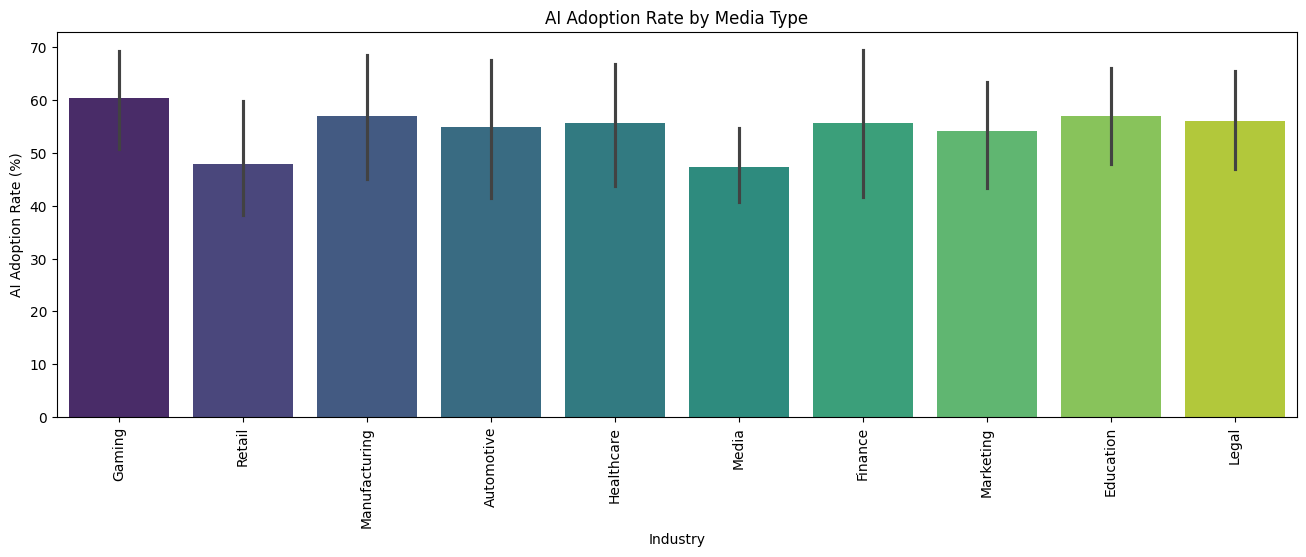

In [131]:
# AI Adoption Rate by Media Type

plt.figure(figsize=(16, 5))
plt.title('AI Adoption Rate by Media Type')
sns.barplot(x='Industry', y='AI Adoption Rate (%)', data=df_sorted, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('AI Adoption Rate (%)')
